# Preliminaries

#### Clone the repository that we will use for our base model. Read more about the paper at : https://arxiv.org/abs/2006.06666

In [ ]:
! git clone https://www.github.com/kdexd/virtex

Cloning into 'virtex'...
remote: Enumerating objects: 3452, done.
remote: Counting objects: 100% (460/460), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 3452 (delta 287), reused 374 (delta 238), pack-reused 2992
Receiving objects: 100% (3452/3452), 1.49 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (2323/2323), done.


In [ ]:
cd virtex

/content/virtex


#### Install requirements

In [ ]:
!cat requirements.txt | grep -v torch > reqs.txt
!pip install -r reqs.txt
!pip install -e .

  Cloning git://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-db4d_hvo
  Running command git clone -q git://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-db4d_hvo
     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 839kB 8.3MB/s 
     |████████████████████████████████| 870kB 44.3MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 6.7MB 25.1MB/s 
     |████████████████████████████████| 1.2MB 43.0MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
  Cloning git://github.com/facebookresearch/fvcore.git to /tmp/pip-install-9epudjkx/fvcore
  Running command git clone -q git://github.com/facebookresearch/fvcore.git /tmp/pip-install-9epudjkx/fvcore
     |████████████████████████████████| 952kB 36.2MB/s 
     |████████████████████████████████| 37.6MB 110kB/s 
  Created wheel for future: filename=future-0.18.0-cp37-none-any.whl size=490415 sha256=979e64fed28e748f257f6b4535bb04618

In [ ]:
ls

CHANGELOG.md  hubconf.py  reqs.txt          setup.py
configs/      LICENSE     requirements.txt  virtex/
docs/         README.md   scripts/          virtex.egg-info/


#### Download annotations for the COCO captions which we will use to build the vocabulary for the model

In [ ]:
! wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-05-05 14:34:39--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.171.51
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.171.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  16.4MB/s    in 32s     

2021-05-05 14:35:11 (7.62 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [ ]:
! unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


#### Build the vocabulary

In [ ]:
!mkdir -p datasets/vocab
!python scripts/preprocess/build_vocabulary.py \
    --captions annotations/captions_train2017.json \
    --vocab-size 10000 \
    --output-prefix datasets/vocab/coco_10k \
    --do-lower-case

sentencepiece_trainer.cc(177) LOG(INFO) Running command:  --input=/tmp/tmp9nk0yccv/captions.txt --vocab_size=10000 --model_prefix=datasets/vocab/coco_10k --model_type=bpe --character_coverage=1.0 --bos_id=-1 --eos_id=-1 --control_symbols=[SOS],[EOS],[MASK]
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /tmp/tmp9nk0yccv/captions.txt
  input_format: 
  model_prefix: datasets/vocab/coco_10k
  model_type: BPE
  vocab_size: 10000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  control_symbols: [SOS]
  control_symbols: [EOS]
  control_symbols: [MASK]
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_s

# Example model architecture for image captioning (VirTex)

--2021-05-03 00:20:09--  https://github.com/kdexd/virtex/raw/master/docs/_static/system_figure.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kdexd/virtex/master/docs/_static/system_figure.jpg [following]
--2021-05-03 00:20:09--  https://raw.githubusercontent.com/kdexd/virtex/master/docs/_static/system_figure.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261916 (256K) [image/jpeg]
Saving to: ‘model_diagram.jpg’

model_diagram.jpg   100%[===================>] 255.78K  --.-KB/s    in 0.02s   

2021-05-03 00:20:09 (11.5 MB/s) - ‘model_diagram.jpg’ saved [261916/261916]



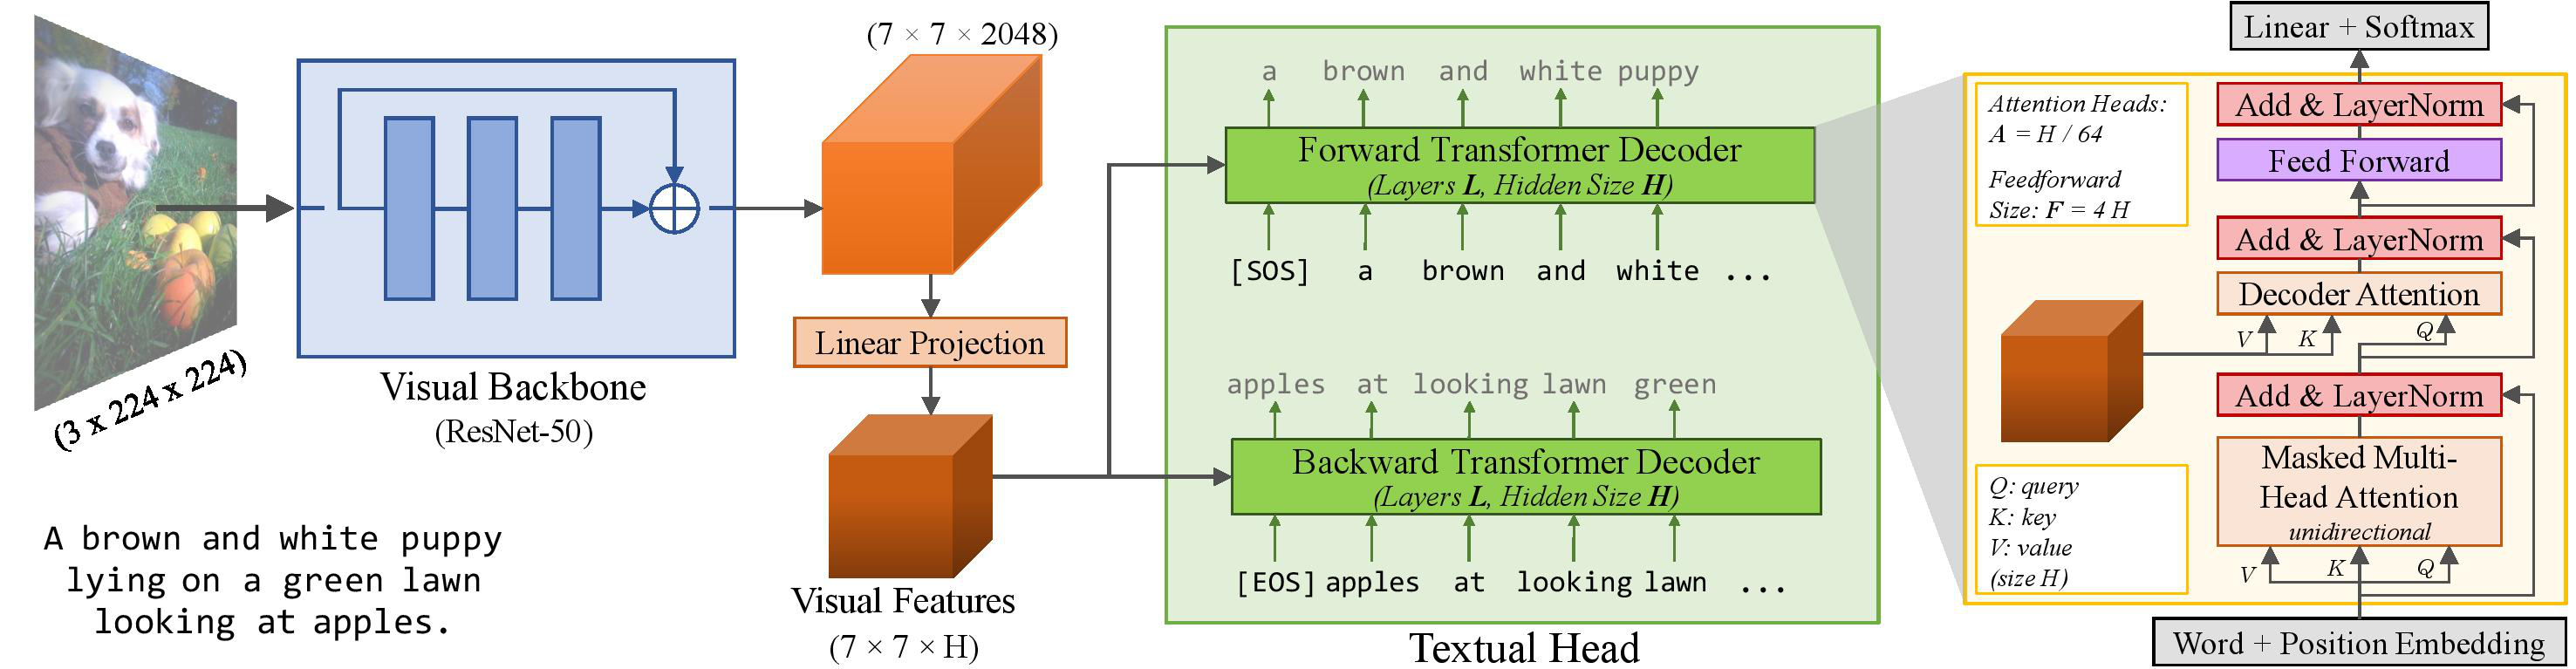

In [ ]:
from PIL import Image
# Add image of the model 
! wget https://github.com/kdexd/virtex/raw/master/docs/_static/system_figure.jpg -O model_diagram.jpg
Image.open("model_diagram.jpg")

# Defining the model

First let's look at the model definition for the model we'll be using.
Then, we're going to load a pre-trained weights into the model and use it to generate some captions.

In [ ]:
import virtex.model_zoo as mz
from virtex.config import Config
from virtex.factories import TokenizerFactory, VisualBackboneFactory, TextualHeadFactory
from virtex.utils.checkpointing import CheckpointManager
import cv2
import numpy as np
from virtex.data import transforms as T
import matplotlib.pyplot as plt
import torch
import torch.utils.data.dataloader
from typing import Callable, Dict, List, Tuple
import warnings
import torch

In [ ]:
import copy
import functools
from typing import Any, Dict

import torch
from torch import nn
from torch.nn import functional as F

from virtex.data.tokenizers import SentencePieceBPETokenizer
from virtex.modules.textual_heads import TextualHead
from virtex.modules.visual_backbones import VisualBackbone


class CaptioningModel(nn.Module):
    r"""
    A model to perform image captioning (in both forward and backward directions
    independently). It is composed of a
    :class:`~virtex.modules.visual_backbones.VisualBackbone` and a
    :class:`~virtex.modules.textual_heads.TextualHead` on top of it.
    Check https://github.com/kdexd/virtex/blob/master/virtex/modules/textual_heads.py for more information on the structure.

    During training, it maximizes the likelihood of ground truth caption
    conditioned on image features. During inference, it predicts a caption for
    an input image through different decoding strategies.

    Parameters
    ----------
    visual: virtex.modules.visual_backbones.VisualBackbone
        A :class:`~virtex.modules.visual_backbones.VisualBackbone` which
        computes visual features from an input image.
    textual: virtex.modules.textual_heads.TextualHead
        A :class:`~virtex.modules.textual_heads.TextualHead` which
        makes final predictions conditioned on visual features.
    beam_size : int, optional (default = 5)
        The width of the beam used for beam search.
    max_decoding_steps: int, optional (default = 30)
        The maximum number of decoding steps for beam search.
    sos_index: int, optional (default = 1)
        The index of the end token (``[SOS]``) in vocabulary.
    eos_index: int, optional (default = 2)
        The index of the end token (``[EOS]``) in vocabulary.
    caption_backward: bool, optional (default = False)
        Whether to *also* perform captioning in backward direction. Default is
        ``False`` -- only forward captioning is performed. When ``True``, a
        clone of textual head is created, which does not share weights with
        "forward" model except input and output embeddings.
    """

    def __init__(
        self,
        visual: VisualBackbone,
        textual: TextualHead,
        beam_size: int = 5,
        max_decoding_steps: int = 30,
        sos_index: int = 1,
        eos_index: int = 2,
        caption_backward: bool = False,
        decoding_strategy: str = "beam_search",
    ):
        super().__init__()
        self.visual = visual
        self.textual = textual
        self.padding_idx = self.textual.padding_idx
        self.caption_backward = caption_backward
        self.decoding_strategy = decoding_strategy

        # Clone the textual module for backward direction if doing captioning
        # in both directions (separately).
        if self.caption_backward:
            self.backward_textual = copy.deepcopy(self.textual)

            # Share weights for visual projection, and input/output embeddings.
            self.backward_textual.visual_projection = self.textual.visual_projection
            self.backward_textual.embedding = self.textual.embedding
            self.backward_textual.output = self.textual.output

        # These boundary indices are needed for beam search.
        self.sos_index = sos_index
        self.eos_index = eos_index

        self.loss = nn.CrossEntropyLoss(ignore_index=self.padding_idx)

    def forward(self, batch: Dict[str, torch.Tensor]) -> Dict[str, Any]:
        r"""
        Given a batch of images and captions, compute log likelihood loss per
        caption token during training. During inference, given a batch of
        images, decode the most likely caption in forward direction through
        beam search decoding.

        Parameters
        ----------
        batch: Dict[str, torch.Tensor]
            A batch of images and (optionally) ground truth caption tokens.
            Possible set of keys: ``{"image_id", "image", "caption_tokens",
            "noitpac_tokens", "caption_lengths"}``.

        Returns
        -------
        Dict[str, Any]

            A dict with the following structure, containing loss for optimization,
            loss components to log directly to tensorboard, and optionally
            predictions.

            .. code-block::

                {
                    "loss": torch.Tensor,
                    "loss_components": {
                        "captioning_forward": torch.Tensor,
                        "captioning_backward": torch.Tensor, (optional)
                    },
                    "predictions": torch.Tensor
                }
        """

        # shape: (batch_size, channels, height, width)
        visual_features = self.visual(batch["image"])
        batch_size = visual_features.size(0)
        if "caption_tokens" in batch:
            caption_tokens = batch["caption_tokens"]
            caption_lengths = batch["caption_lengths"]

            # shape: (batch_size, max_caption_length, vocab_size)
            output_logits = self.textual(
                visual_features, caption_tokens, caption_lengths
            )
            loss = self.loss(
                output_logits[:, :-1].contiguous().view(-1, self.textual.vocab_size),
                caption_tokens[:, 1:].contiguous().view(-1),
            )
            output_dict: Dict[str, Any] = {
                "loss": loss,
                # Single scalar per batch for logging in training script.
                "loss_components": {"captioning_forward": loss.clone().detach()},
            }
            # Do captioning in backward direction if specified.
            if self.caption_backward:
                backward_caption_tokens = batch["noitpac_tokens"]

                backward_output_logits = self.backward_textual(
                    visual_features,
                    backward_caption_tokens,
                    caption_lengths,
                )
                backward_loss = self.loss(
                    backward_output_logits[:, :-1]
                    .contiguous()
                    .view(-1, self.textual.vocab_size),
                    backward_caption_tokens[:, 1:].contiguous().view(-1),
                )
                output_dict["loss"] += backward_loss

                # Single scalar per batch for logging in training script.
                output_dict["loss_components"].update(
                    captioning_backward=backward_loss.clone().detach()
                )

            if not self.training:
                # During validation (while pretraining), get best prediction
                # at every time-step.
                output_dict["predictions"] = torch.argmax(output_logits, dim=-1)
        else:
            # During inference, get beam search predictions for forward
            # model. Predictions from forward transformer will be shifted
            # right by one time-step.
            start_predictions = visual_features.new_full(
                (batch_size,), self.sos_index
            ).long()
            # Add image features as a default argument to match callable
            # signature accepted by beam search class (partial captions only).
            search_step = functools.partial(
                  self.search_step, visual_features
              )

            all_top_k_predictions, _ = self.decoding.search(
                start_predictions, search_step
            )
            if self.decoding_strategy == "beam_search":
                final_best_prediction = all_top_k_predictions[:, 0, :]
            elif self.decoding_strategy == "greedy_search":
                final_best_prediction = all_top_k_predictions[:, 0]
            elif self.decoding_strategy == "sample":
                final_best_prediction = all_top_k_predictions[:, 0]
            elif self.decoding_strategy == "sample_adjusted":
                final_best_prediction = all_top_k_predictions[:, 0]
            output_dict = {"predictions": final_best_prediction, "full_beam": all_top_k_predictions}

        return output_dict

    def search_step(
        self, visual_features: torch.Tensor, partial_captions: torch.Tensor
    ) -> torch.Tensor:
        r"""
        Given visual features and a batch of (assumed) partial captions, predict
        the distribution over vocabulary tokens for next time-step. 

        Parameters
        ----------
        projected_visual_features: torch.Tensor
            A tensor of shape ``(batch_size, ..., textual_feature_size)``
            with visual features already projected to ``textual_feature_size``.
        partial_captions: torch.Tensor
            A tensor of shape ``(batch_size * beam_size, timesteps)``
            containing tokens predicted so far -- one for each beam. We need all
            prior predictions because our model is auto-regressive.

        Returns
        -------
        torch.Tensor
            A tensor of shape ``(batch_size * beam_size, vocab_size)`` -- output
            distribution over tokens for next time-step.
        """

        # Expand and repeat image features while doing beam search.
        batch_size, channels, height, width = visual_features.size()
        beam_size = int(partial_captions.size(0) / batch_size)
        if beam_size > 1:
            # shape: (batch_size * beam_size, channels, height, width)
            visual_features = visual_features.unsqueeze(1).repeat(1, beam_size, 1, 1, 1)
            visual_features = visual_features.view(
                batch_size * beam_size, channels, height, width
            )

        # Provide caption lengths as current length (irrespective of predicted
        # EOS/padding tokens). shape: (batch_size, )
        caption_lengths = torch.ones_like(partial_captions)
        if len(caption_lengths.size()) == 2:
            caption_lengths = caption_lengths.sum(1)
        else:
            # Add a time-step. shape: (batch_size, 1)
            partial_captions = partial_captions.unsqueeze(1)

        # shape: (batch_size * beam_size, partial_caption_length, vocab_size)
        output_logits = self.textual(
            visual_features, partial_captions, caption_lengths
        )
        # Keep features for last time-step only, we only care about those.
        output_logits = output_logits[:, -1, :]

        # Return logprobs as required by `AutoRegressiveBeamSearch`.
        # shape: (batch_size * beam_size, vocab_size)
        next_logprobs = F.log_softmax(output_logits, dim=1)

        # Set logprobs of last predicted tokens as high negative value to avoid
        # repetition in caption.
        for index in range(batch_size * beam_size):
            next_logprobs[index, partial_captions[index, -1]] = -10000

        return next_logprobs

Define the config and tokenizer as per the definitions expected by the model (code base specific, don't worry too much about this)

In [ ]:
_C = Config("configs/width_ablations/bicaptioning_R_50_L1_H2048.yaml", ["MODEL.NAME", "bicaptioning" ])
tokenizer = TokenizerFactory.from_config(_C)

Use this to cast your model to the right device - to decide whether to use CPU or GPU.

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

Download the weights of the pre-trained model

In [ ]:
# Taken from http://kdexd.xyz/virtex/virtex/usage/model_zoo.html
!wget https://umich.box.com/shared/static/zu8zxtxrron29icd76owgjzojmfcgdk3.pth -O model_weights.pth


--2021-05-05 14:52:26--  https://umich.box.com/shared/static/zu8zxtxrron29icd76owgjzojmfcgdk3.pth
Resolving umich.box.com (umich.box.com)... 103.116.4.197
Connecting to umich.box.com (umich.box.com)|103.116.4.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/zu8zxtxrron29icd76owgjzojmfcgdk3.pth [following]
--2021-05-05 14:52:26--  https://umich.box.com/public/static/zu8zxtxrron29icd76owgjzojmfcgdk3.pth
Reusing existing connection to umich.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://umich.app.box.com/public/static/zu8zxtxrron29icd76owgjzojmfcgdk3.pth [following]
--2021-05-05 14:52:27--  https://umich.app.box.com/public/static/zu8zxtxrron29icd76owgjzojmfcgdk3.pth
Resolving umich.app.box.com (umich.app.box.com)... 103.116.4.201
Connecting to umich.app.box.com (umich.app.box.com)|103.116.4.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pub

# Now lets look at an example!

In [ ]:
#! wget 'http://images.cocodataset.org/val2017/000000039769.jpg' -O example.jpg
! wget 'https://doglab.com/wp-content/uploads/Border-collie-leaping-and-catching-red-platic-frisbee-in-mouth.jpg' -O example.jpg

--2021-05-05 14:53:28--  https://doglab.com/wp-content/uploads/Border-collie-leaping-and-catching-red-platic-frisbee-in-mouth.jpg
Resolving doglab.com (doglab.com)... 104.26.13.92, 104.26.12.92, 172.67.74.189, ...
Connecting to doglab.com (doglab.com)|104.26.13.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56846 (56K) [image/jpeg]
Saving to: ‘example.jpg’

example.jpg         100%[===================>]  55.51K   323KB/s    in 0.2s    

2021-05-05 14:53:29 (323 KB/s) - ‘example.jpg’ saved [56846/56846]



In [ ]:
def pre_process_img(path):

  image_transform = T.DEFAULT_IMAGE_TRANSFORM
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = image_transform(image=image)["image"]
  image = np.transpose(image, (2, 0, 1))
  return {"image_id": "42", "image": torch.tensor(image)}

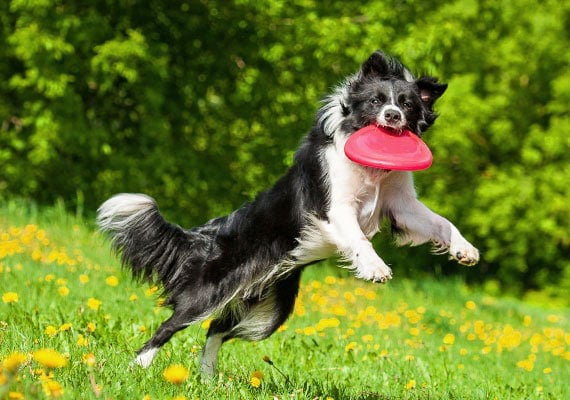

In [ ]:
from PIL import Image
pil_img = Image.open("example.jpg")
pil_img

In [ ]:
input = pre_process_img("example.jpg")

# Generation using different decoding strategies!

In [ ]:
# Short names for commonly annotated types.
StateType = Dict[str, torch.Tensor]
StepFunctionType = Callable[..., torch.Tensor]

## Greedy Search

In [ ]:
class GreedySearch(object):
  """
  Implements the greedy search algorithm for decoding the most likely captions.

  Parameters
    ----------
    end_index: int
        The index of the end token (``[EOS]``) in vocabulary.
    max_steps: int, optional (default = 50)
        The maximum number of decoding steps.
  """

  def __init__(
        self,
        end_index: int,
        max_steps: int = 50,
    ) -> None:
        self._end_index = end_index
        self.max_steps = max_steps

  def search(
        self, start_predictions: torch.Tensor, step: StepFunctionType
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Given a starting state and a step function, apply greedy search to find
        the most likely target captions.

        Parameters
        ----------
        start_predictions : torch.Tensor
            Tensor containing the initial predictions, shape ``(batch_size, )``.
            Usually the initial predictions are just the index of the start
            token (``[SOS]``) in the vocabulary.
        step : Callable[..., torch.Tensor]
            A function that is responsible for computing the next most likely
            tokens, given the past predictions. Predictions from all previous
            time-steps are required, not just the last time-step, because our
            model is auto-regressive.
            The function is expected to return a tensor of shape
            ``(group_size, target_vocab_size)`` containing
            the log probs of the tokens for the next step.

        Returns
        -------
        Tuple[torch.Tensor, torch.Tensor]
            Tuple of ``(predictions, log_probs)``, where ``predictions``
            has shape ``(batch_size, max_steps)`` and ``log_probs``
            has shape ``(batch_size, beam_size)``.
        """
        predictions = []
        print(f"To start predictions, we initialize using the BOS token: {start_predictions} ")
        batch_size = start_predictions.size()[0]
        print(f"batch_size", batch_size)

        start_class_log_probs = step(start_predictions)
        start_top_log_probs, start_predicted_classes = start_class_log_probs.topk(
            1
        )
        # The log probs for the last time step.
        # shape: (batch_size, beam_size)
        last_log_probs = start_top_log_probs

        # shape: [(batch_size, 1)]
        predictions.append(start_predicted_classes)

        num_classes = start_class_log_probs.size()[1]

        # Log probability tensor that mandates that the end token is selected.
        # shape: (batch_size, num_classes)
        log_probs_after_end = start_class_log_probs.new_full(
            (batch_size , num_classes), float("-inf")
        )
        log_probs_after_end[:, self._end_index] = 0.0


        for timestep in range(self.max_steps - 1):
            print("################################")
            print(f"Starting step {timestep+1}")
            
            # shape: (batch_size,)
            last_predictions = predictions[-1].reshape(batch_size)

            print("Check if predictions from the last time step are EOS for all batch elements. ")
            # If every predicted token from the last step is `self._end_index`,
            # then we can stop early.
            if (last_predictions == self._end_index).all():
                print("All predictions are EOS so we break out of loop")
                break
            
            predictions_so_far = torch.stack(predictions).permute(1, 2, 0).view(
                batch_size, -1
            )
            print(f"Input to the model of size {predictions_so_far.shape}")
            if predictions_so_far.size(1) > 1:
              print(f"Decoded input for inspection: {tokenizer.decode(predictions_so_far.squeeze().tolist())}")
            else:
              print(f"Decoded input for inspection: {tokenizer.decode([predictions_so_far.squeeze().tolist()])}")

            print(f"Take a greedy search step with this as input to get log probs for the next word")
            # shape: (batch_size, num_classes)
            class_log_probs = step(predictions_so_far)

            print(f"Predicted log probs for this step: {class_log_probs}, of shape {class_log_probs.shape}")
            # shape: (batch_size, num_classes)
            last_predictions_expanded = last_predictions.unsqueeze(-1).expand(
                batch_size, num_classes
            )

            print(f"Here we are finding batch elements where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the it to predict the end token this timestep as well.")
            # Here we are finding any beams where we predicted the end token in
            # the previous timestep and replacing the distribution with a
            # one-hot distribution, forcing the beam to predict the end token
            # this timestep as well.
            # shape: (batch_size , num_classes)
            cleaned_log_probs = torch.where(
                last_predictions_expanded == self._end_index,
                log_probs_after_end,
                class_log_probs,
            )
            print(f"Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: {cleaned_log_probs}, of shape {cleaned_log_probs.shape}")


            # shape (both): (batch_size, 1)
            top_log_probs, predicted_classes = cleaned_log_probs.topk(
                1
            )

            print(f"Taking the prediction with the highest score, we get predictions as {predicted_classes} i.e. '{tokenizer.decode([predicted_classes.squeeze().tolist()])}' of shape {predicted_classes.shape} ")
            
            predictions.append(predicted_classes)

            # shape: (batch_size, beam_size)
            last_log_probs = top_log_probs

        return torch.cat(predictions), last_log_probs

Define the model with the decoding module as GreedySearch. 

In [ ]:
class BidirectionalCaptioningModel(CaptioningModel):
    r"""
    Convenient extension of :class:`~virtex.models.captioning.CaptioningModel`
    for better readability: this passes ``caption_backward=True`` to super class.
    """

    def __init__(
        self,
        visual: VisualBackbone,
        textual: TextualHead,
        beam_size: int = 5,
        max_decoding_steps: int = 30,
        sos_index: int = 1,
        eos_index: int = 2,
    ):
        super().__init__(
            visual,
            textual,
            beam_size=beam_size,
            max_decoding_steps=max_decoding_steps,
            sos_index=sos_index,
            eos_index=eos_index,
            caption_backward=True,
            decoding_strategy = "greedy_search", 
        )

        self.decoding = GreedySearch(self.eos_index, max_steps=max_decoding_steps)
        



In [ ]:
#@title Helper code for loading VirTex model
from virtex.factories import Factory 

class PretrainingModelFactory(Factory):
    r"""
    Factory to create :mod:`~virtex.models` for different pretraining tasks.
    Possible choices: ``{"bicaptioning", "captioning", "masked_lm",
    "token_classification", "multilabel_classification"}``.
    """

    PRODUCTS: Dict[str, Callable] = {
        "bicaptioning": BidirectionalCaptioningModel,
    }

    @classmethod
    def from_config(cls, config: Config) -> nn.Module:
        r"""
        Create a model directly from config.
        Parameters
        ----------
        config: virtex.config.Config
            Config object with all the parameters.
        """

        _C = config

        # Build visual and textual streams based on config.
        visual = VisualBackboneFactory.from_config(_C)
        textual = TextualHeadFactory.from_config(_C)

        # Add model specific kwargs. Refer call signatures of specific models
        # for matching kwargs here.
        if _C.MODEL.NAME in {"virtex", "captioning", "bicaptioning"}:
            kwargs = {
                "max_decoding_steps": _C.DATA.MAX_CAPTION_LENGTH,
                "sos_index": _C.DATA.SOS_INDEX,
                "eos_index": _C.DATA.EOS_INDEX,
            }

        elif _C.MODEL.NAME == "token_classification":
            kwargs = {
                "ignore_indices": [
                    _C.DATA.UNK_INDEX,
                    _C.DATA.SOS_INDEX,
                    _C.DATA.EOS_INDEX,
                    _C.DATA.MASK_INDEX,
                ]
            }
        elif _C.MODEL.NAME == "multilabel_classification":
            kwargs = {"ignore_indices": [0]}  # background index
        else:
            kwargs = {}

        return cls.create(_C.MODEL.NAME, visual, textual, **kwargs)

In [ ]:
#@title Defines the model according to the speficied config. Expand to see the model definition and loading of weights.
model = PretrainingModelFactory.from_config(_C).to(device)
model.eval()
print("Defined the model!")

# Loads the model from the weights that we downloaded
CheckpointManager(model=model).load("model_weights.pth")
print("Loaded weights!")

# Uncomment line below to see the model definition
# model 


2021-05-05 15:04:03.782 | INFO     | virtex.utils.checkpointing:load:156 - Rank 0: Loading checkpoint from model_weights.pth


Defined the model!


2021-05-05 15:04:04.717 | INFO     | virtex.utils.checkpointing:load:166 - Rank 0: Loading model from model_weights.pth


Loaded weights!


In [ ]:
output_dict = model(torch.utils.data.dataloader.default_collate([input]))

To start predictions, we initialize using the BOS token: tensor([1]) 
batch_size 1
################################
Starting step 1
Check if predictions from the last time step are EOS for all batch elements. 
Input to the model of size torch.Size([1, 1])
Decoded input for inspection: a
Take a greedy search step with this as input to get log probs for the next word
Predicted log probs for this step: tensor([[-15.4598, -13.3148, -17.2491,  ..., -15.7129, -15.5357, -14.9080]],
       grad_fn=<CopySlices>), of shape torch.Size([1, 10000])
Here we are finding batch elements where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the it to predict the end token this timestep as well.
Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: tensor([[-15.4598, -13.3148, -17.2491,  ..., -15.7129, -15.5357, -14.9080]],
       grad_fn=<SWhereBackward>), of shape torch.Size([1, 10000])
Taking the

In [ ]:
best_prediction = output_dict["predictions"]
beam_predictions = output_dict["full_beam"]

In [ ]:
print(tokenizer.decode([x for x in best_prediction.tolist()]))

a dog jumping in the air catching a frisbee in its mouth.


## Beam Search

In [ ]:
class AutoRegressiveBeamSearch(object):
    r"""
    Implements the beam search algorithm for decoding the most likely captions.

    Parameters
    ----------
    end_index: int
        The index of the end token (``[EOS]``) in vocabulary.
    max_steps: int, optional (default = 50)
        The maximum number of decoding steps.
    beam_size: int, optional (default = 5)
        The width of the beam used.
    per_node_beam_size: int, optional (default = 2)
        The maximum number of candidates to consider per node, at each step in
        the search. Setting this parameter to a number smaller than `beam_size`
        may give better results, as it can introduce more diversity into the
        search. See `Beam Search Strategies for Neural Machine Translation.
        Freitag and Al-Onaizan, 2017 <https://arxiv.org/abs/1702.01806>`_.
    """

    def __init__(
        self,
        end_index: int,
        max_steps: int = 50,
        beam_size: int = 10,
        per_node_beam_size: int = 5,
    ) -> None:
        self._end_index = end_index
        self.max_steps = max_steps
        self.beam_size = beam_size
        self.per_node_beam_size = per_node_beam_size or beam_size

    def search(
        self, start_predictions: torch.Tensor, step: StepFunctionType
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        r"""
        Given a starting state and a step function, apply beam search to find
        the most likely target captions.

        .. note::

            If your step function returns ``-inf`` for some log probs
            (like if you're using a masked log-softmax) then some of the "best"
            captions returned may have ``-inf`` log probability. Specifically
            this happens when the beam size is smaller than the number of actions
            with finite log probability (non-zero probability) returned by the
            step function. Therefore if you're using a mask you may want to
            check the results from ``search`` and potentially discard captions
            with non-finite log probability.

        Parameters
        ----------
        start_predictions : torch.Tensor
            Tensor containing the initial predictions, shape ``(batch_size, )``.
            Usually the initial predictions are just the index of the start
            token (``[SOS]``) in the vocabulary.
        step : Callable[..., torch.Tensor]
            A function that is responsible for computing the next most likely
            tokens, given the past predictions. Predictions from all previous
            time-steps are required, not just the last time-step.  The function should
            The function is expected to return a tensor of shape
            ``(group_size, target_vocab_size)`` containing
            the log probs of the tokens for the next step.

        Returns
        -------
        Tuple[torch.Tensor, torch.Tensor]
            Tuple of ``(predictions, log_probs)``, where ``predictions``
            has shape ``(batch_size, beam_size, max_steps)`` and ``log_probs``
            has shape ``(batch_size, beam_size)``.
        """
        print(f"To start predictions, we initialize using the BOS token: {start_predictions} ")
        batch_size = start_predictions.size()[0]
        print(f"batch_size", batch_size)

        # List of `(batch_size, beam_size, length)` tensors.
        # Does not include the start symbols, which are implicit.
        predictions: torch.Tensor = torch.empty((batch_size, self.beam_size, 0), dtype=torch.long, device=start_predictions.device)
        print(f"Start off with empty predictions list: {predictions}")

        print("################################")
        print("Starting step 0 (special case)")
        # Calculate the first timestep. This is done outside the main loop
        # because we are going from a single decoder input (the output from the
        # encoder) to the top `beam_size` decoder outputs. On the other hand,
        # within the main loop we are going from the `beam_size` elements of the
        # beam to `beam_size`^2 candidates from which we will select the top
        # `beam_size` elements for the next iteration.
        # shape: (batch_size, num_classes)
        start_class_log_probs = step(start_predictions)
        print(f"Taking one beam search step using the beginning of sequence tokens, we get the following as the output: {start_class_log_probs}")

        print(f"This is only for the very first step, one input (BOS) gives beam_size outputs that starts the sequence. ")
        print(f"For producing the rest of the sequence, beam size inputs -> beam_size * per_node_beam_size outputs. From those, the top beam_size elements are extracted. ")

        num_classes = start_class_log_probs.size()[1]
        print(f"The size of the vocabulary is {num_classes}")

        print("Take the top k words according to their log probability")
        # shape: (batch_size, beam_size), (batch_size, beam_size)
        start_top_log_probs, start_predicted_classes = start_class_log_probs.topk(
            self.beam_size
        )
        if (
            self.beam_size == 1
            and (start_predicted_classes == self._end_index).all()
        ):
            warnings.warn(
                "Empty captions predicted. You may want to increase beam "
                "size or ensure your step function is working properly.",
                RuntimeWarning,
            )
            return start_predicted_classes.unsqueeze(-1), start_top_log_probs
        print(f"The first step predictions are : {start_predicted_classes}")


        # The log probs for the last time step.
        # shape: (batch_size, beam_size)
        last_log_probs = start_top_log_probs

        # shape: (batch_size, beam_size, len)
        predictions = torch.cat([predictions, start_predicted_classes.unsqueeze(-1)], dim=-1)

        def print_current_beam():
          """Helper function to print the current beam"""
          scores = last_log_probs
          for batch_id in range(scores.shape[0]):
            print("Batch item", batch_id)
            for beam_id in range(scores.shape[1]):
              sequence = predictions[batch_id, beam_id].tolist()
              print(f"\tscores={round(scores[batch_id][beam_id].item(),2)}\t {tokenizer.decode(sequence)}")

        print_current_beam()
        # Log probability tensor that mandates that the end token is selected.
        # shape: (batch_size * beam_size, num_classes)
        log_probs_after_end = start_class_log_probs.new_full(
            (batch_size * self.beam_size, num_classes), float("-inf")
        )
        log_probs_after_end[:, self._end_index] = 0.0

        # print(f"Here we prepare a dummy log-prob matrix thats filled with -inf (most negative value) except for the index of the EOS token, to make sure that it will definitely be picked as the highest scoring index if this vector is used as the next log prob.")

        for timestep in range(self.max_steps - 1):
            print("################################")
            print(f"Starting step {timestep+1}")

            # shape: (batch_size * beam_size,)
            last_predictions = predictions[:, :, -1].reshape(batch_size * self.beam_size)

            print("Check if predictions from the last time step are all EOS. ")
            # If every predicted token from the last step is `self._end_index`,
            # then we can stop early.
            if (last_predictions == self._end_index).all():
                print("All predictions are EOS so we break out of loop")
                break

            predictions_so_far = predictions.view(
                batch_size * self.beam_size, -1
            )
            print(f"Now, collapse the batch and beam dimension so that you now have input to the model of size {predictions_so_far.shape}")
            # print(f"Decoded input for inspection: {[tokenizer.decode(x) for x in predictions_so_far.tolist()]}")
          

            print(f"Take a beam search step with this as input to get log probs for the next word")
            # shape: (batch_size * beam_size, num_classes)
            class_log_probs = step(predictions_so_far)

            print(f"Predicted log probs for this step: {class_log_probs}, of shape {class_log_probs.shape}")
            # shape: (batch_size * beam_size, num_classes)
            last_predictions_expanded = last_predictions.unsqueeze(-1).expand(
                batch_size * self.beam_size, num_classes
            )

            print(f"Here we are finding any beams where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the beam to predict the end token this timestep as well.")
            # Here we are finding any beams where we predicted the end token in
            # the previous timestep and replacing the distribution with a
            # one-hot distribution, forcing the beam to predict the end token
            # this timestep as well.
            # shape: (batch_size * beam_size, num_classes)
            cleaned_log_probs = torch.where(
                last_predictions_expanded == self._end_index,
                log_probs_after_end,
                class_log_probs,
            )
            print(f"Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: {cleaned_log_probs}, of shape {cleaned_log_probs.shape}")


            # shape (both): (batch_size * beam_size, per_node_beam_size)
            top_log_probs, predicted_classes = cleaned_log_probs.topk(
                self.per_node_beam_size
            )
            print(f"Taking the top per_node_beam_size predictions, we get predictions per node as {predicted_classes} i.e. '{[tokenizer.decode(x) for x in  predicted_classes.squeeze(0).tolist()]}' of shape {predicted_classes.shape} ")


            # Here we expand the last log probs to `(batch_size * beam_size,
            # per_node_beam_size)` so that we can add them to the current log
            # probs for this timestep. This lets us maintain the log
            # probability of each element on the beam.
            # shape: (batch_size * beam_size, per_node_beam_size)
            expanded_last_log_probs = (
                last_log_probs.unsqueeze(2)
                .expand(batch_size, self.beam_size, self.per_node_beam_size)
                .reshape(batch_size * self.beam_size, self.per_node_beam_size)
            )
            # shape: (batch_size * beam_size, per_node_beam_size)
            summed_top_log_probs = top_log_probs + expanded_last_log_probs

            # shape: (batch_size, beam_size * per_node_beam_size)
            reshaped_summed = summed_top_log_probs.reshape(
                batch_size, self.beam_size * self.per_node_beam_size
            )
            # shape: (batch_size, beam_size * per_node_beam_size)
            reshaped_predicted_classes = predicted_classes.reshape(
                batch_size, self.beam_size * self.per_node_beam_size
            )

            # Append the predictions to the current beam
            reshaped_beam = (
                predictions.view(batch_size * self.beam_size, 1, -1)
                .repeat(1, self.per_node_beam_size, 1)
                .reshape(batch_size, self.beam_size * self.per_node_beam_size, -1)
            )
            reshaped_beam = torch.cat([reshaped_beam, reshaped_predicted_classes.unsqueeze(-1)], dim=-1)


            # Keep only the top `beam_size` beam indices.
            # shape: (batch_size, beam_size), (batch_size, beam_size)
            restricted_beam_log_probs, restricted_beam_indices = reshaped_summed.topk(
                self.beam_size
            )

            print(f"Reshape the predictions so that you have beam_size * per_node_beam_size predictios for each batch element: {reshaped_predicted_classes}, i.e '{tokenizer.decode(reshaped_predicted_classes.squeeze().tolist())}' of size {reshaped_predicted_classes.shape} ")
            print(f"Now we use the running sum of the log probability of a sequence to choose the top beam_size predictions")

            # Use the beam indices to extract the corresponding classes.
            # shape: (batch_size, beam_size)
            restricted_predicted_classes = reshaped_predicted_classes.gather(
                1, restricted_beam_indices
            )

            print(f"This gives us as predictions for this timestep: {restricted_predicted_classes} i.e '{tokenizer.decode(restricted_predicted_classes.squeeze().tolist())}' with scores {restricted_beam_log_probs} of shape {restricted_predicted_classes.shape} ")
            
            predictions = reshaped_beam.gather(1, restricted_beam_indices.unsqueeze(-1).repeat(1,1,reshaped_beam.shape[-1]))

            # shape: (batch_size, beam_size)
            last_log_probs = restricted_beam_log_probs

            print_current_beam()

        if not torch.isfinite(last_log_probs).all():
            warnings.warn(
                "Infinite log probs encountered. Some final captions may not "
                "make sense. This can happen when the beam size is larger than"
                " the number of valid (non-zero probability) transitions that "
                "the step function produces.",
                RuntimeWarning,
            )

        print("################################")
        print(f"Now we have the predictions for all time steps. Time to extract the full sequence using backpointers")
        print_current_beam()
        return predictions, last_log_probs
        




Define the model with the decoding module as Beam Search. 

In [ ]:
class BidirectionalCaptioningModel(CaptioningModel):
    r"""
    Convenient extension of :class:`~virtex.models.captioning.CaptioningModel`
    for better readability: this passes ``caption_backward=True`` to super class.
    """

    def __init__(
        self,
        visual: VisualBackbone,
        textual: TextualHead,
        beam_size: int = 10,
        per_node_beam_size: int = 5,
        max_decoding_steps: int = 30,
        sos_index: int = 1,
        eos_index: int = 2,
    ):
        super().__init__(
            visual,
            textual,
            beam_size=beam_size,
            max_decoding_steps=max_decoding_steps,
            sos_index=sos_index,
            eos_index=eos_index,
            caption_backward=True,
            decoding_strategy = "beam_search", 
        )

        self.decoding = AutoRegressiveBeamSearch(self.eos_index, max_steps=max_decoding_steps, beam_size=beam_size, per_node_beam_size=per_node_beam_size)
        



In [ ]:
#@title Helper code for loading VirTex model
from virtex.factories import Factory 

class PretrainingModelFactory(Factory):
    r"""
    Factory to create :mod:`~virtex.models` for different pretraining tasks.
    Possible choices: ``{"bicaptioning", "captioning", "masked_lm",
    "token_classification", "multilabel_classification"}``.
    """

    PRODUCTS: Dict[str, Callable] = {
        "bicaptioning": BidirectionalCaptioningModel,
    }

    @classmethod
    def from_config(cls, config: Config) -> nn.Module:
        r"""
        Create a model directly from config.
        Parameters
        ----------
        config: virtex.config.Config
            Config object with all the parameters.
        """

        _C = config

        # Build visual and textual streams based on config.
        visual = VisualBackboneFactory.from_config(_C)
        textual = TextualHeadFactory.from_config(_C)

        # Add model specific kwargs. Refer call signatures of specific models
        # for matching kwargs here.
        if _C.MODEL.NAME in {"virtex", "captioning", "bicaptioning"}:
            kwargs = {
                "max_decoding_steps": _C.DATA.MAX_CAPTION_LENGTH,
                "sos_index": _C.DATA.SOS_INDEX,
                "eos_index": _C.DATA.EOS_INDEX,
            }

        elif _C.MODEL.NAME == "token_classification":
            kwargs = {
                "ignore_indices": [
                    _C.DATA.UNK_INDEX,
                    _C.DATA.SOS_INDEX,
                    _C.DATA.EOS_INDEX,
                    _C.DATA.MASK_INDEX,
                ]
            }
        elif _C.MODEL.NAME == "multilabel_classification":
            kwargs = {"ignore_indices": [0]}  # background index
        else:
            kwargs = {}

        return cls.create(_C.MODEL.NAME, visual, textual, **kwargs)

In [ ]:
#@title Defines the model according to the speficied config. Expand to see the model definition and loading of weights.
model = PretrainingModelFactory.from_config(_C).to(device)
model.eval()
print("Defined the model!")

# Loads the model from the weights that we downloaded
CheckpointManager(model=model).load("model_weights.pth")
print("Loaded weights!")


2021-05-05 15:40:15.787 | INFO     | virtex.utils.checkpointing:load:156 - Rank 0: Loading checkpoint from model_weights.pth


Defined the model!


2021-05-05 15:40:16.397 | INFO     | virtex.utils.checkpointing:load:166 - Rank 0: Loading model from model_weights.pth


Loaded weights!


In [ ]:
output_dict = model(torch.utils.data.dataloader.default_collate([input]))

To start predictions, we initialize using the BOS token: tensor([1]) 
batch_size 1
Start off with empty predictions list: tensor([], size=(1, 10, 0), dtype=torch.int64)
################################
Starting step 0 (special case)
Taking one beam search step using the beginning of sequence tokens, we get the following as the output: tensor([[   -17.1365, -10000.0000,    -17.3181,  ...,    -17.8956,
            -17.0668,    -17.0697]], grad_fn=<CopySlices>)
This is only for the very first step, one input (BOS) gives beam_size outputs that starts the sequence. 
For producing the rest of the sequence, beam size inputs -> beam_size * per_node_beam_size outputs. From those, the top beam_size elements are extracted. 
The size of the vocabulary is 10000
Take the top k words according to their log probability
The first step predictions are : tensor([[  4,  21, 177, 487,  25, 292, 196,  56,  84, 187]])
Batch item 0
	scores=-0.1	 a
	scores=-3.45	 the
	scores=-3.78	 dog
	scores=-4.63	 this
	sco

In [ ]:
best_prediction = output_dict["predictions"]
beam_predictions = output_dict["full_beam"]

In [ ]:
 print(tokenizer.decode(best_prediction[0].tolist()))

a dog jumping in the air catching a frisbee.


In [ ]:
# for all in beam 
[tokenizer.decode(x) for x in beam_predictions.tolist()[0]]

['a dog jumping in the air catching a frisbee.',
 'a dog jumping in the air to catch a frisbee.',
 'a dog jumping up in the air catching a frisbee.',
 'a dog jumping in the air catching a frisbee in its mouth.',
 'a dog jumping in the air catching a frisbee in the air.']

#### Reasoning behind having per_node_beam_size smaller than beam_size : 
Beam Search Strategies for Neural Machine Translation: "We observed that at each time step during the decoding
process, most of the partial hypotheses share
the same predecessor words. To introduce
more diversity, we allow only a fixed number
of candidates with the same history at each
time step. Given a maximum candidate
threshold *mc* and an active candidate list *C*,
a candidate c ∈ C is discarded if already
mc better scoring partial hyps with the same
history are in the candidate list."

## Naive sampling

In [ ]:
class Sample(object):
  """
  Implements the sampling algorithms for decoding captions.

  Parameters
    ----------
    end_index: int
        The index of the end token (``[EOS]``) in vocabulary.
    max_steps: int, optional (default = 50)
        The maximum number of decoding steps.
  """
  def __init__(
        self,
        end_index: int,
        max_steps: int = 50,
        temperature: float = 1.0
    ) -> None:
        self._end_index = end_index
        self.max_steps = max_steps
        self.temperature = temperature

  def search(
      self, start_predictions: torch.Tensor, step: StepFunctionType
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Given a starting state and a step function, apply sampling.

        Parameters
        ----------
        start_predictions : torch.Tensor
            Tensor containing the initial predictions, shape ``(batch_size, )``.
            Usually the initial predictions are just the index of the start
            token (``[SOS]``) in the vocabulary.
        step : Callable[..., torch.Tensor]
            A function that is responsible for computing the next most likely
            tokens, given the past predictions. Predictions from all previous
            time-steps are required, not just the last time-step, because our
            model is auto-regressive.
            The function is expected to return a tensor of shape
            ``(group_size, target_vocab_size)`` containing
            the log probs of the tokens for the next step.

        Returns
        -------
        Tuple[torch.Tensor, torch.Tensor]
            Tuple of ``(predictions, log_probs)``, where ``predictions``
            has shape ``(batch_size, max_steps)`` and ``log_probs``
            has shape ``(batch_size, beam_size)``.
        """
        predictions = []
        print(f"To start predictions, we initialize using the BOS token: {start_predictions} ")
        batch_size = start_predictions.size()[0]
        print(f"batch_size", batch_size)

        start_class_log_probs = step(start_predictions)

        probs = F.softmax(start_class_log_probs/self.temperature, dim=-1)
        start_predicted_classes = torch.multinomial(probs, num_samples=1)

        predictions.append(start_predicted_classes)

        num_classes = start_class_log_probs.size()[1]

        # Log probability tensor that mandates that the end token is selected.
        # shape: (batch_size, num_classes)
        log_probs_after_end = start_class_log_probs.new_full(
            (batch_size , num_classes), float("-inf")
        )
        log_probs_after_end[:, self._end_index] = 0.0

        for timestep in range(self.max_steps - 1):
            print("################################")
            print(f"Starting step {timestep+1}")

            # shape: (batch_size * beam_size,)
            last_predictions = predictions[-1].reshape(batch_size)

            print("Check if predictions from the last time step are EOS for all batch elements. ")
            # If every predicted token from the last step is `self._end_index`,
            # then we can stop early.
            if (last_predictions == self._end_index).all():
                print("All predictions are EOS so we break out of loop")
                break
            
            predictions_so_far = torch.stack(predictions).permute(1, 2, 0).view(
                batch_size, -1
            )
            print(f"Input to the model of size {predictions_so_far.shape}")

            print(f"Take a step with this as input to get log probs for the next word")
            # shape: (batch_size, num_classes)
            class_log_probs = step(predictions_so_far)

            print(f"Predicted log probs for this step: {class_log_probs}, of shape {class_log_probs.shape}")
            # shape: (batch_size, num_classes)
            last_predictions_expanded = last_predictions.unsqueeze(-1).expand(
                batch_size, num_classes
            )

            print(f"Here we are finding batch elements where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the it to predict the end token this timestep as well.")
            # Here we are finding any beams where we predicted the end token in
            # the previous timestep and replacing the distribution with a
            # one-hot distribution, forcing the beam to predict the end token
            # this timestep as well.
            # shape: (batch_size , num_classes)
            cleaned_log_probs = torch.where(
                last_predictions_expanded == self._end_index,
                log_probs_after_end,
                class_log_probs,
            )
            print(f"Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: {cleaned_log_probs}, of shape {cleaned_log_probs.shape}")
            
            probs = F.softmax(cleaned_log_probs/self.temperature, dim=-1)
            predicted_classes = torch.multinomial(probs, num_samples=1)

            print(f"Sampling a prediction for each batch element, we get predictions as {predicted_classes} of shape {predicted_classes.shape} ")

            predictions.append(predicted_classes)


        return torch.cat(predictions), None

In [ ]:
class BidirectionalCaptioningModel(CaptioningModel):
    r"""
    Convenient extension of :class:`~virtex.models.captioning.CaptioningModel`
    for better readability: this passes ``caption_backward=True`` to super class.
    """

    def __init__(
        self,
        visual: VisualBackbone,
        textual: TextualHead,
        beam_size: int = 5,
        max_decoding_steps: int = 30,
        sos_index: int = 1,
        eos_index: int = 2,
        temperature: float = 1 ,
    ):
        super().__init__(
            visual,
            textual,
            beam_size=beam_size,
            max_decoding_steps=max_decoding_steps,
            sos_index=sos_index,
            eos_index=eos_index,
            caption_backward=True,
            decoding_strategy = "sample", 
        )
        self.decoding = Sample(self.eos_index, max_steps=max_decoding_steps, temperature=temperature)





In [ ]:
#@title Helper code for loading VirTex model
from virtex.factories import Factory 

class PretrainingModelFactory(Factory):
    r"""
    Factory to create :mod:`~virtex.models` for different pretraining tasks.
    Possible choices: ``{"bicaptioning", "captioning", "masked_lm",
    "token_classification", "multilabel_classification"}``.
    """

    PRODUCTS: Dict[str, Callable] = {
        "bicaptioning": BidirectionalCaptioningModel,
    }

    @classmethod
    def from_config(cls, config: Config) -> nn.Module:
        r"""
        Create a model directly from config.
        Parameters
        ----------
        config: virtex.config.Config
            Config object with all the parameters.
        """

        _C = config

        # Build visual and textual streams based on config.
        visual = VisualBackboneFactory.from_config(_C)
        textual = TextualHeadFactory.from_config(_C)

        # Add model specific kwargs. Refer call signatures of specific models
        # for matching kwargs here.
        if _C.MODEL.NAME in {"virtex", "captioning", "bicaptioning"}:
            kwargs = {
                "max_decoding_steps": _C.DATA.MAX_CAPTION_LENGTH,
                "sos_index": _C.DATA.SOS_INDEX,
                "eos_index": _C.DATA.EOS_INDEX,
            }

        elif _C.MODEL.NAME == "token_classification":
            kwargs = {
                "ignore_indices": [
                    _C.DATA.UNK_INDEX,
                    _C.DATA.SOS_INDEX,
                    _C.DATA.EOS_INDEX,
                    _C.DATA.MASK_INDEX,
                ]
            }
        elif _C.MODEL.NAME == "multilabel_classification":
            kwargs = {"ignore_indices": [0]}  # background index
        else:
            kwargs = {}

        return cls.create(_C.MODEL.NAME, visual, textual, **kwargs)

In [ ]:
#@title Defines the model according to the speficied config. Expand to see the model definition and loading of weights.
model = PretrainingModelFactory.from_config(_C).to(device)
model.eval()
print("Defined the model!")

# Loads the model from the weights that we downloaded
CheckpointManager(model=model).load("model_weights.pth")
print("Loaded weights!")


2021-05-05 15:53:53.466 | INFO     | virtex.utils.checkpointing:load:156 - Rank 0: Loading checkpoint from model_weights.pth


Defined the model!


2021-05-05 15:53:53.822 | INFO     | virtex.utils.checkpointing:load:166 - Rank 0: Loading model from model_weights.pth


Loaded weights!


In [ ]:
output_dict = model(torch.utils.data.dataloader.default_collate([input]))

To start predictions, we initialize using the BOS token: tensor([1]) 
batch_size 1
################################
Starting step 1
Check if predictions from the last time step are EOS for all batch elements. 
Input to the model of size torch.Size([1, 1])
Take a step with this as input to get log probs for the next word
Predicted log probs for this step: tensor([[-14.0152, -11.4690, -15.6019,  ..., -14.9278, -12.7693, -13.8258]],
       grad_fn=<CopySlices>), of shape torch.Size([1, 10000])
Here we are finding batch elements where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the it to predict the end token this timestep as well.
Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: tensor([[-14.0152, -11.4690, -15.6019,  ..., -14.9278, -12.7693, -13.8258]],
       grad_fn=<SWhereBackward>), of shape torch.Size([1, 10000])
Sampling a prediction for each batch element, we get pre

In [ ]:
best_prediction = output_dict["predictions"]
beam_predictions = output_dict["full_beam"]

In [ ]:
print(tokenizer.decode([x for x in best_prediction.tolist()]))

two dog to catch frisbee in mid air catching a red frisbee.


Lets change the temperature

In [ ]:
model.decoding.temperature = 1e-30

In [ ]:
output_dict = model(torch.utils.data.dataloader.default_collate([input]))

To start predictions, we initialize using the BOS token: tensor([1]) 
batch_size 1
################################
Starting step 1
Check if predictions from the last time step are EOS for all batch elements. 
Input to the model of size torch.Size([1, 1])
Take a step with this as input to get log probs for the next word
Predicted log probs for this step: tensor([[-15.4598, -13.3148, -17.2491,  ..., -15.7129, -15.5357, -14.9080]],
       grad_fn=<CopySlices>), of shape torch.Size([1, 10000])
Here we are finding batch elements where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the it to predict the end token this timestep as well.
Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: tensor([[-15.4598, -13.3148, -17.2491,  ..., -15.7129, -15.5357, -14.9080]],
       grad_fn=<SWhereBackward>), of shape torch.Size([1, 10000])
Sampling a prediction for each batch element, we get pre

In [ ]:
best_prediction = output_dict["predictions"]
beam_predictions = output_dict["full_beam"]

In [ ]:
print(tokenizer.decode([x for x in best_prediction.tolist()]))

a dog jumping in the air catching a frisbee in its mouth.


## Top-p and top-k sampling 

In [ ]:
class SampleAdjusted(object):
  """
  Implements the sampling algorithms for decoding captions.

  Parameters
    ----------
    end_index: int
        The index of the end token (``[EOS]``) in vocabulary.
    max_steps: int, optional (default = 50)
        The maximum number of decoding steps.
  """
  def __init__(
        self,
        end_index: int,
        max_steps: int = 50,
        temperature: float = 1.0,
        top_k: int = 5,
        top_p: float = 0.0 
    ) -> None:
        self._end_index = end_index
        self.max_steps = max_steps
        self.temperature = temperature
        self.top_k = top_k
        self.top_p = top_p 

  def top_k_top_p_filtering(self, logits, filter_value=-float('Inf')):
    """ Filter a distribution of logits using top-k and/or nucleus (top-p) filtering
        Args:
            logits: logits distribution shape (vocabulary size)
            top_k > 0: keep only top k tokens with highest probability (top-k filtering).
            top_p > 0.0: keep the top tokens with cumulative probability >= top_p (nucleus filtering).
                Nucleus filtering is described in Holtzman et al. (http://arxiv.org/abs/1904.09751)
        From: https://gist.github.com/thomwolf/1a5a29f6962089e871b94cbd09daf317
    """

    top_k = min(self.top_k, logits.size(-1))  # Safety check
    if top_k > 0:
        # Remove all tokens with a probability less than the last token of the top-k
        indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
        logits[indices_to_remove] = filter_value
    if self.top_p > 0.0:
        sorted_logits, sorted_indices = torch.sort(logits, descending=True)
        cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)
        # Remove tokens with cumulative probability above the threshold
        sorted_indices_to_remove = cumulative_probs > self.top_p
        # Shift the indices to the right to keep also the first token above the threshold
        sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
        sorted_indices_to_remove[..., 0] = 0

        # scatter sorted tensors to original indexing
        indices_to_remove = sorted_indices_to_remove.scatter(dim=1, index=sorted_indices, src=sorted_indices_to_remove)
        logits[indices_to_remove] = filter_value
    return logits


  def search(
      self, start_predictions: torch.Tensor, step: StepFunctionType
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Given a starting state and a step function, apply top-p/top-k sampling to find
        the most likely target captions.

        Parameters
        ----------
        start_predictions : torch.Tensor
            Tensor containing the initial predictions, shape ``(batch_size, )``.
            Usually the initial predictions are just the index of the start
            token (``[SOS]``) in the vocabulary.
        step : Callable[..., torch.Tensor]
            A function that is responsible for computing the next most likely
            tokens, given the past predictions. Predictions from all previous
            time-steps are required, not just the last time-step, because our
            model is auto-regressive.
            The function is expected to return a tensor of shape
            ``(group_size, target_vocab_size)`` containing
            the log probs of the tokens for the next step.

        Returns
        -------
        Tuple[torch.Tensor, torch.Tensor]
            Tuple of ``(predictions, log_probs)``, where ``predictions``
            has shape ``(batch_size, max_steps)`` and ``log_probs``
            has shape ``(batch_size, beam_size)``.
        """
        predictions = []
        print(f"To start predictions, we initialize using the BOS token: {start_predictions} ")
        batch_size = start_predictions.size()[0]
        print(f"batch_size", batch_size)

        start_class_log_probs = step(start_predictions)

        adjusted_log_probs = self.top_k_top_p_filtering(start_class_log_probs)

        probs = F.softmax(adjusted_log_probs, dim=-1)
        start_predicted_classes = torch.multinomial(probs, num_samples=1)

        predictions.append(start_predicted_classes)

        num_classes = start_class_log_probs.size()[1]

        # Log probability tensor that mandates that the end token is selected.
        # shape: (batch_size, num_classes)
        log_probs_after_end = start_class_log_probs.new_full(
            (batch_size , num_classes), float("-inf")
        )
        log_probs_after_end[:, self._end_index] = 0.0

        for timestep in range(self.max_steps - 1):
            print("################################")
            print(f"Starting step {timestep+1}")

            # shape: (batch_size * beam_size,)
            last_predictions = predictions[-1].reshape(batch_size)

            print("Check if predictions from the last time step are EOS for all batch elements. ")
            # If every predicted token from the last step is `self._end_index`,
            # then we can stop early.
            if (last_predictions == self._end_index).all():
                print("All predictions are EOS so we break out of loop")
                break
            
            predictions_so_far = torch.stack(predictions).permute(1, 2, 0).view(
                batch_size, -1
            )
            print(f"Input to the model of size {predictions_so_far.shape}")

            print(f"Take a step with this as input to get log probs for the next word")
            # shape: (batch_size, num_classes)
            class_log_probs = step(predictions_so_far)

            print(f"Predicted log probs for this step: {class_log_probs}, of shape {class_log_probs.shape}")

            adjusted_log_probs = self.top_k_top_p_filtering(class_log_probs)

            print(f"Adjusted log probs for this step: {adjusted_log_probs}, of shape {adjusted_log_probs.shape}")
            
            # shape: (batch_size, num_classes)
            last_predictions_expanded = last_predictions.unsqueeze(-1).expand(
                batch_size, num_classes
            )

            print(f"Here we are finding batch elements where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the it to predict the end token this timestep as well.")
            # Here we are finding any beams where we predicted the end token in
            # the previous timestep and replacing the distribution with a
            # one-hot distribution, forcing the beam to predict the end token
            # this timestep as well.
            # shape: (batch_size , num_classes)
            cleaned_log_probs = torch.where(
                last_predictions_expanded == self._end_index,
                log_probs_after_end,
                adjusted_log_probs,
            )
            print(f"Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: {cleaned_log_probs}, of shape {cleaned_log_probs.shape}")
            
            probs = F.softmax(cleaned_log_probs, dim=-1)
            predicted_classes = torch.multinomial(probs, num_samples=1)

            print(f"Sampling a prediction for each batch element, we get predictions as {predicted_classes} of shape {predicted_classes.shape} ")

            predictions.append(predicted_classes)


        return torch.cat(predictions), None

In [ ]:
class BidirectionalCaptioningModel(CaptioningModel):
    r"""
    Convenient extension of :class:`~virtex.models.captioning.CaptioningModel`
    for better readability: this passes ``caption_backward=True`` to super class.
    """

    def __init__(
        self,
        visual: VisualBackbone,
        textual: TextualHead,
        beam_size: int = 5,
        max_decoding_steps: int = 30,
        sos_index: int = 1,
        eos_index: int = 2,
        temperature: float = 1 ,
        top_p = 0.0, 
        top_k = 0,
    ):
        super().__init__(
            visual,
            textual,
            beam_size=beam_size,
            max_decoding_steps=max_decoding_steps,
            sos_index=sos_index,
            eos_index=eos_index,
            caption_backward=True,
            decoding_strategy = "sample_adjusted", 
        )
        self.decoding = SampleAdjusted(self.eos_index, max_steps=max_decoding_steps, temperature=temperature, top_k=top_k, top_p=top_p)





In [ ]:
#@title Helper code for loading VirTex model
from virtex.factories import Factory 

class PretrainingModelFactory(Factory):
    r"""
    Factory to create :mod:`~virtex.models` for different pretraining tasks.
    Possible choices: ``{"bicaptioning", "captioning", "masked_lm",
    "token_classification", "multilabel_classification"}``.
    """

    PRODUCTS: Dict[str, Callable] = {
        "bicaptioning": BidirectionalCaptioningModel,
    }

    @classmethod
    def from_config(cls, config: Config) -> nn.Module:
        r"""
        Create a model directly from config.
        Parameters
        ----------
        config: virtex.config.Config
            Config object with all the parameters.
        """

        _C = config

        # Build visual and textual streams based on config.
        visual = VisualBackboneFactory.from_config(_C)
        textual = TextualHeadFactory.from_config(_C)

        # Add model specific kwargs. Refer call signatures of specific models
        # for matching kwargs here.
        if _C.MODEL.NAME in {"virtex", "captioning", "bicaptioning"}:
            kwargs = {
                "max_decoding_steps": _C.DATA.MAX_CAPTION_LENGTH,
                "sos_index": _C.DATA.SOS_INDEX,
                "eos_index": _C.DATA.EOS_INDEX,
            }

        elif _C.MODEL.NAME == "token_classification":
            kwargs = {
                "ignore_indices": [
                    _C.DATA.UNK_INDEX,
                    _C.DATA.SOS_INDEX,
                    _C.DATA.EOS_INDEX,
                    _C.DATA.MASK_INDEX,
                ]
            }
        elif _C.MODEL.NAME == "multilabel_classification":
            kwargs = {"ignore_indices": [0]}  # background index
        else:
            kwargs = {}

        return cls.create(_C.MODEL.NAME, visual, textual, **kwargs)

In [ ]:
#@title Defines the model according to the speficied config. Expand to see the model definition and loading of weights.
model = PretrainingModelFactory.from_config(_C).to(device)
model.eval()
print("Defined the model!")

# Loads the model from the weights that we downloaded
CheckpointManager(model=model).load("model_weights.pth")
print("Loaded weights!")


2021-05-05 15:59:41.065 | INFO     | virtex.utils.checkpointing:load:156 - Rank 0: Loading checkpoint from model_weights.pth


Defined the model!


2021-05-05 15:59:41.514 | INFO     | virtex.utils.checkpointing:load:166 - Rank 0: Loading model from model_weights.pth


Loaded weights!


 Lets set k to 10

In [ ]:
model.decoding.top_k = 10 # try with k=1 should be same as greedy 
model.decoding.top_p = 0.0

In [ ]:
output_dict = model(torch.utils.data.dataloader.default_collate([input]))

To start predictions, we initialize using the BOS token: tensor([1]) 
batch_size 1
################################
Starting step 1
Check if predictions from the last time step are EOS for all batch elements. 
Input to the model of size torch.Size([1, 1])
Take a step with this as input to get log probs for the next word
Predicted log probs for this step: tensor([[-15.4598, -13.3148, -17.2491,  ..., -15.7129, -15.5357, -14.9080]],
       grad_fn=<CopySlices>), of shape torch.Size([1, 10000])
Adjusted log probs for this step: tensor([[-inf, -inf, -inf,  ..., -inf, -inf, -inf]],
       grad_fn=<IndexPutBackward>), of shape torch.Size([1, 10000])
Here we are finding batch elements where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the it to predict the end token this timestep as well.
Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: tensor([[-inf, -inf, -inf,  ..., -inf, -inf,

In [ ]:
best_prediction = output_dict["predictions"]
beam_predictions = output_dict["full_beam"]

In [ ]:
print(tokenizer.decode([x for x in best_prediction.tolist()]))

a dog jumping in the air catching a frisbee


Lets try changing the top-p value:

In [ ]:
model.decoding.top_k = 0 
model.decoding.top_p = 0.5

In [ ]:
output_dict = model(torch.utils.data.dataloader.default_collate([input]))

To start predictions, we initialize using the BOS token: tensor([1]) 
batch_size 1
################################
Starting step 1
Check if predictions from the last time step are EOS for all batch elements. 
Input to the model of size torch.Size([1, 1])
Take a step with this as input to get log probs for the next word
Predicted log probs for this step: tensor([[-15.4598, -13.3148, -17.2491,  ..., -15.7129, -15.5357, -14.9080]],
       grad_fn=<CopySlices>), of shape torch.Size([1, 10000])
Adjusted log probs for this step: tensor([[-inf, -inf, -inf,  ..., -inf, -inf, -inf]],
       grad_fn=<IndexPutBackward>), of shape torch.Size([1, 10000])
Here we are finding batch elements where we predicted the end token in the previous timestep and replacing the distribution with a one-hot distribution, forcing the it to predict the end token this timestep as well.
Predicted log probs for this step after modifying to ensure EOS is only followed by EOS: tensor([[-inf, -inf, -inf,  ..., -inf, -inf,

In [ ]:
best_prediction = output_dict["predictions"]
beam_predictions = output_dict["full_beam"]

In [ ]:
try: 
  print(tokenizer.decode([x for x in best_prediction.tolist()]))
except:
  print(tokenizer.decode(best_prediction[0].tolist()))

a dog jumping in the air catching a frisbee in its mouth.
